This analysis is borrowed from here http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

In [337]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import seaborn as sns
sns.set()

In [243]:
df = pd.read_csv('Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [244]:
df.dropna(inplace=True)

In [245]:
df = pd.get_dummies(df, drop_first=True)

In [246]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [247]:
X_df = df.drop('Salary', axis=1)
X = X_df.values

In [248]:
Y = df['Salary'].values.reshape(-1, 1)

In [379]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [398]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_scaled, Y_scaled)

In [399]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_scaled)
print("r^2", lr.score(X_test_scaled, Y_test_scaled))

r^2 0.32116429167691873


(-2.0, 2.0)

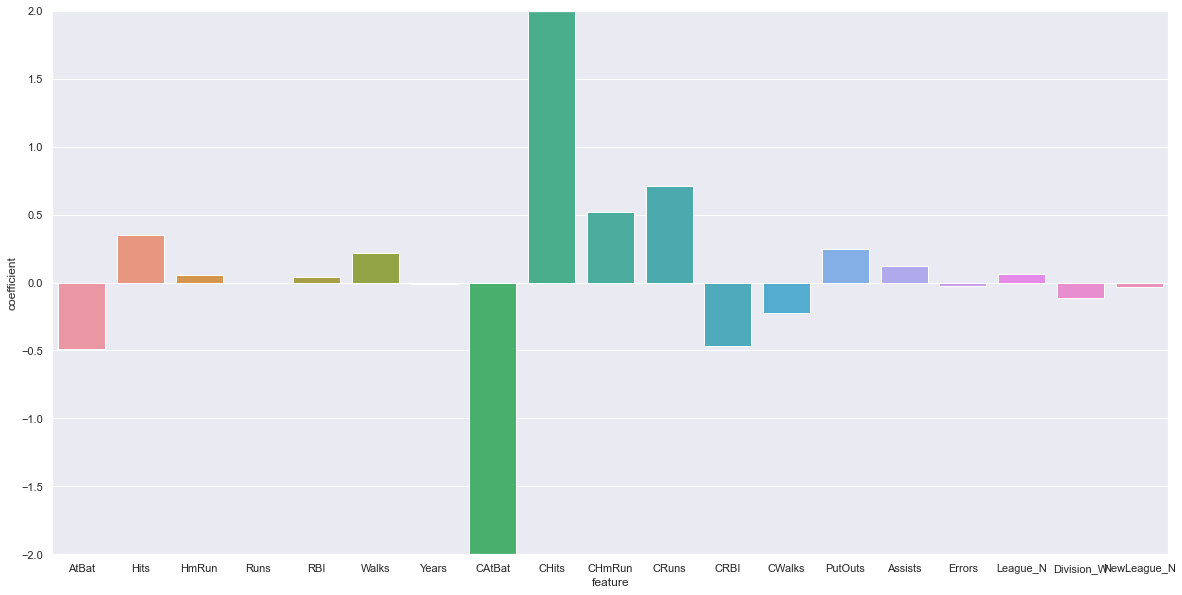

In [400]:
lr_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : lr.coef_[0]})
plt.figure(figsize=(20, 10))
sns.barplot(x='feature', y='coefficient', data=lr_coef_df)
plt.ylim(-2, 2)

In [401]:
rr = Ridge(alpha=1)
rr.fit(X_train_scaled, Y_train_scaled) 
print("sum of coefficients", sum(np.abs(rr.coef_[0])))
print("r^2", rr.score(X_test_scaled, Y_test_scaled))

sum of coefficients 5.063057673461335
r^2 0.439326449726523


(-2.0, 2.0)

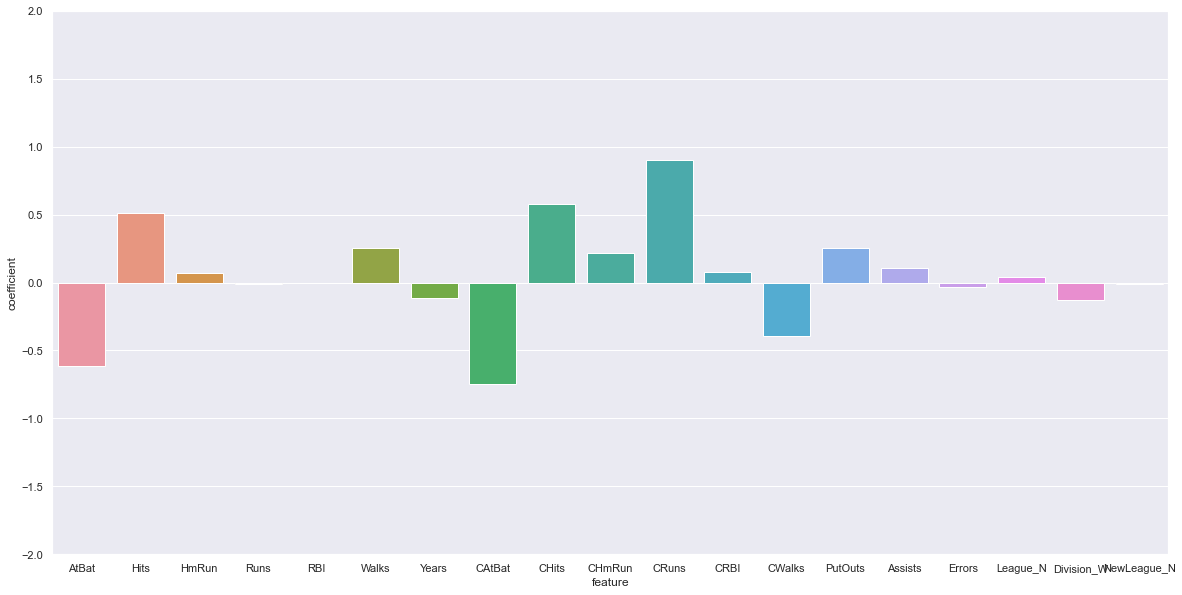

In [402]:
rr_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : rr.coef_[0]})
plt.figure(figsize=(20, 10))
sns.barplot(x='feature', y='coefficient', data=rr_coef_df)
plt.ylim(-2, 2)

(-2.0, 2.0)

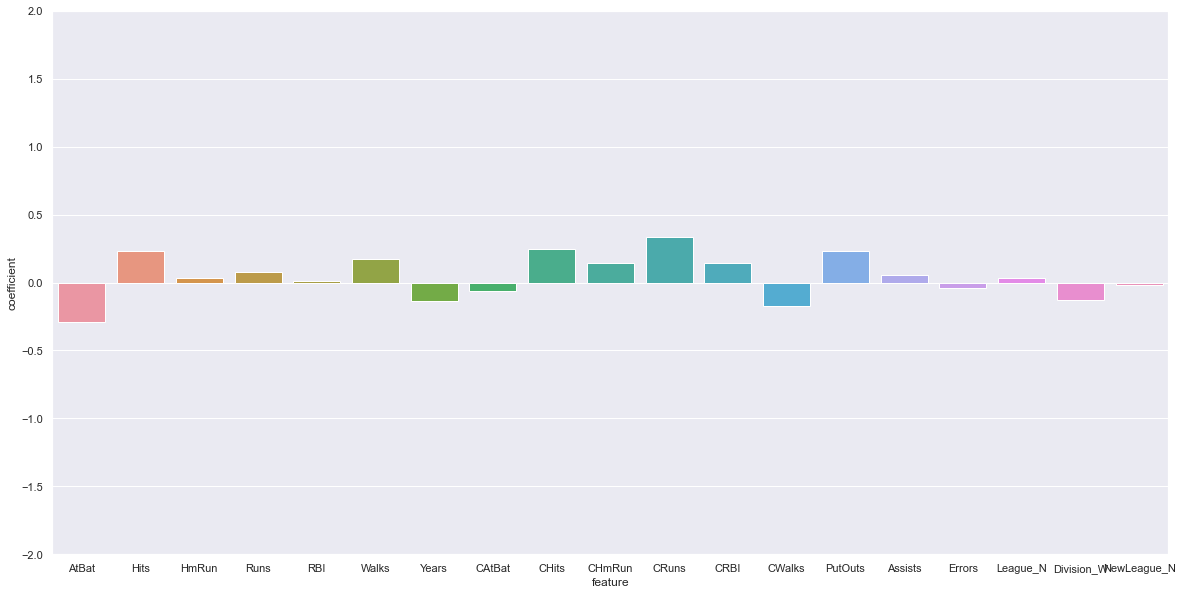

In [419]:
rr = Ridge(alpha=10)
rr.fit(X_train_scaled, Y_train_scaled)
rr_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : rr.coef_[0]})
plt.figure(figsize=(20, 10))
sns.barplot(x='feature', y='coefficient', data=rr_coef_df)
plt.ylim(-2, 2)

(-2.0, 2.0)

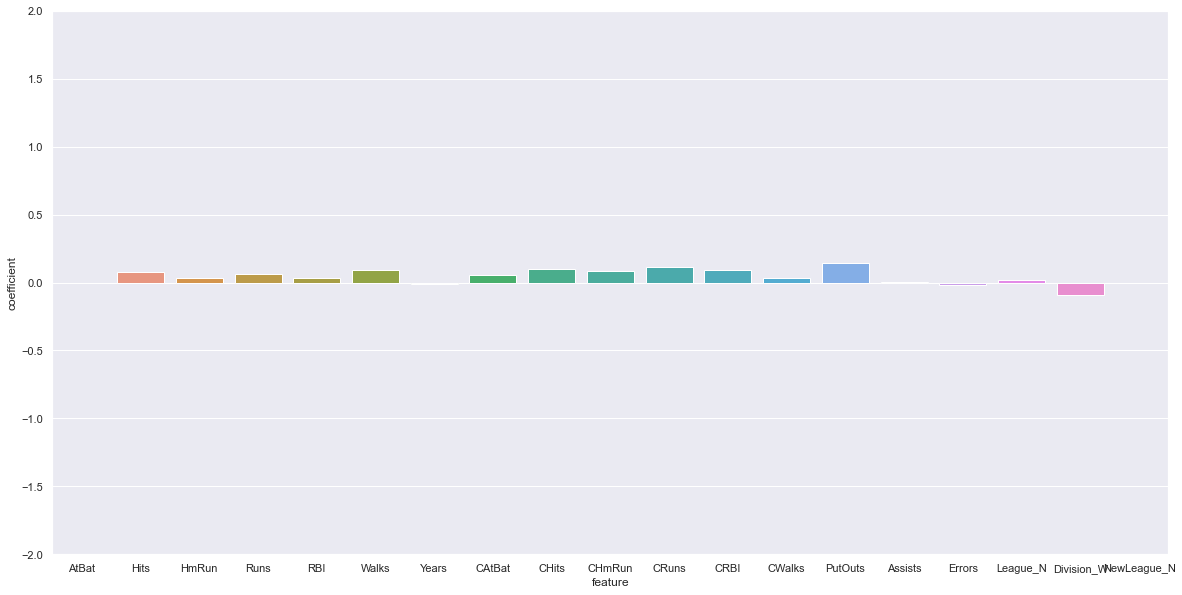

In [420]:
rr = Ridge(alpha=100)
rr.fit(X_train_scaled, Y_train_scaled)
rr_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : rr.coef_[0]})
plt.figure(figsize=(20, 10))
sns.barplot(x='feature', y='coefficient', data=rr_coef_df)
plt.ylim(-2, 2)

In [403]:
lasso = Lasso()
lasso.fit(X_train_scaled, Y_train_scaled)
print("sum of coefficients", sum(np.abs(lasso.coef_)))
print("r^2", lasso.score(X_test_scaled, Y_test_scaled))

sum of coefficients 0.0
r^2 -0.004382894454604491


In [404]:
lasso = Lasso(0.1)
lasso.fit(X_train_scaled, Y_train_scaled) 
print(lasso.coef_)
print("sum of coefficients", sum(np.abs(lasso.coef_)))
print("r^2", lasso.score(X_test_scaled, Y_test_scaled))

[ 0.          0.10787052  0.00068595  0.          0.          0.09447899
  0.          0.          0.          0.09112073  0.3545766   0.
  0.          0.13234955 -0.         -0.          0.         -0.03550548
 -0.        ]
sum of coefficients 0.8165878104652841
r^2 0.4576559270201299


(-2.0, 2.0)

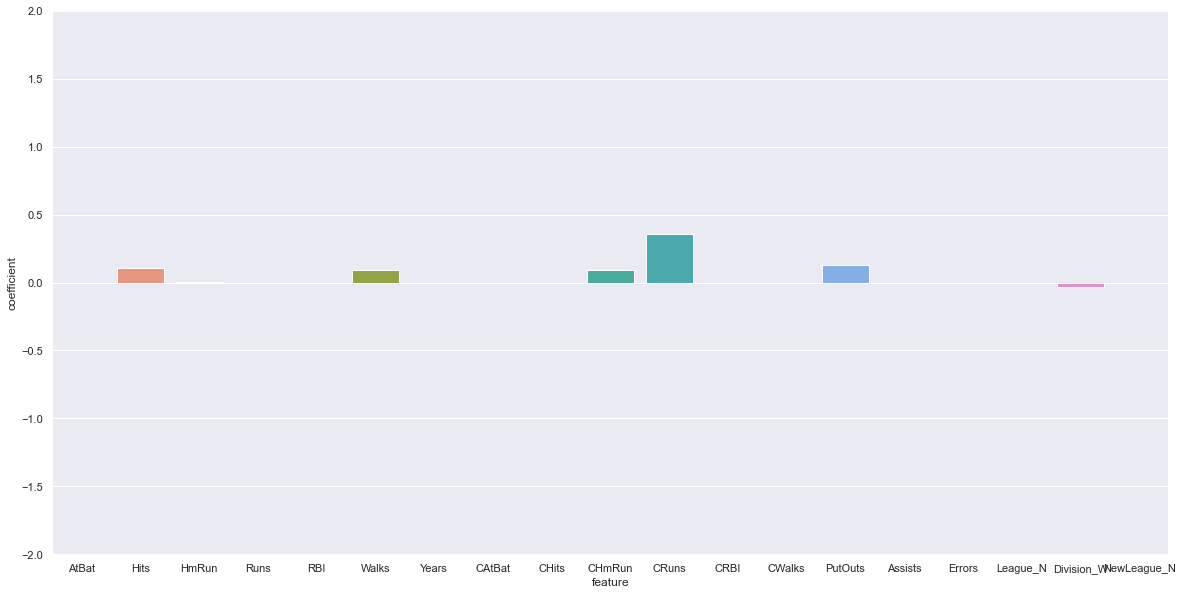

In [405]:
lasso_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : lasso.coef_})
plt.figure(figsize=(20, 10))
sns.barplot(x='feature', y='coefficient', data=lasso_coef_df)
plt.ylim(-2, 2)

In [406]:
lasso_coef_df[lasso_coef_df['coefficient'] != 0]

,feature,coefficient
1,Hits,0.107871
2,HmRun,0.000686
5,Walks,0.094479
9,CHmRun,0.091121
10,CRuns,0.354577
13,PutOuts,0.132350
17,Division_W,-0.035505


In [407]:
enet = ElasticNet()
enet.fit(X_train_scaled, Y_train_scaled)
print("coefficients", enet.coef_)
print("sum of coefficients", sum(enet.coef_))
print("r^2", enet.score(X_test_scaled, Y_test_scaled))

coefficients [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00468844  0.02059945
  0.          0.         -0.         -0.         -0.         -0.
 -0.        ]
sum of coefficients 0.025287886602377622
r^2 0.02754674567125348


In [418]:
enet = ElasticNet(alpha=0.01)
enet.fit(X_train_scaled, Y_train_scaled)
print("coefficients", enet.coef_)
print("sum of coefficients", sum(enet.coef_))
print("r^2", enet.score(X_test_scaled, Y_test_scaled))

coefficients [-0.50345904  0.44688418  0.05254516  0.          0.00112069  0.22725696
 -0.13850446 -0.16330568  0.17123334  0.19155758  0.72713169  0.03666902
 -0.31516416  0.24267144  0.05984181 -0.01771003  0.01823687 -0.12589797
 -0.        ]
sum of coefficients 0.9111073898854583
r^2 0.45824984319215156
